Collaborative coding using GitHub
===========

Alexandre Perera Luna, Mónica Rojas Martínez

December 15th 2023


# Goal

The objective of this assignment is to construct a project through collaborative coding, showcasing an Exploratory Data Analysis (EDA) and a classification. To facilitate your understanding of GitHub, we will utilize code snippets from previous exercises, allowing you to focus on the process without concerns about the final outcome. The current notebook will serve as the main function in the project, and each participant is required to develop additional components and integrate their contributions into the main branch.


## Requirements

In order to work with functions created in other jupyter notebooks you need to install the package `nbimporter` using a shell and the following command:

<font color='grey'>pip install nbimporter</font> 

`nbimporter` allows you to import jupyter notebooks as modules. Once intalled and imported, you can use a command like the following to import a function called *fibonacci* that is stored on a notebook *fibbo_func* in the same path as the present notebook:

<font color='green'>from</font> fibbo_func <font color='green'>import</font> fibbonaci  <font color='green'>as</font> fibbo



In [78]:
## Modify this cell by importing all the necessary modules you need to solve the assigmnent. Observe that we are importing
## the library nbimporter. You will need it for calling fuctions created in other notebooks. 
#import nbimporter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scat_plt import scat_plt 
from normalize import normalize
from dataframe_editor import dataframe_editor
from renamevars import renamevars

In [2]:
# Here is an example of invoking the Fibonacci function, whisch should be located in the same directory as the main:
from fibbo_func import fibbonaci as fibbo
fibbo(24)

ModuleNotFoundError: No module named 'fibbo_func'

## Exercises
As an illustration of Git workflow, you will analyze the *Parkinson's* dataset, which has been previously examined in past assignments. Each team member has specific responsibilities that may be crucial for the progress of others. Make sure all of you organize your tasks accordingly. We've structured the analysis into modules to assist you in tracking your tasks, but feel free to deviate from it if you prefer.   
Please use Markdown cells for describing your workflow and expalining the findings of your work. 
Remember you need both, to modify this notebook and, to create additional functions outside. Your work will only be available for others when you modify and merge your changes.


In [26]:
# We will start by loading the parkinson dataset. The rest is up to you!
df = pd.read_csv('parkinsons.data', 
                 dtype = { # indicate categorical variables
                     'status': 'category'})
df.head(5)
df.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

### 1. Cleaning and tidying the dataset

In [27]:
# your code here
dict_names = {'MDVP:Fo(Hz)':'avFF',
              'MDVP:Fhi(Hz)':'maxFF', 
              'MDVP:Flo(Hz)':'minFF',
              'MDVP:Jitter(%)': 'percJitter',
              'MDVP:Jitter(Abs)':'absJitter' ,
              'MDVP:RAP': 'rap',
              'MDVP:PPQ': 'ppq',
              'Jitter:DDP': 'ddp',
              'MDVP:Shimmer' : 'lShimer',
              'MDVP:Shimmer(dB)': 'dbShimer',
              'Shimmer:APQ3':'apq3',
              'Shimmer:APQ5': 'apq5',
              'MDVP:APQ':'apq',
              'Shimmer:DDA':'dda'}

renamed_df = renamevars(df, dict_names)
renamed_df.columns

Index(['name', 'avFF', 'maxFF', 'minFF', 'percJitter', 'absJitter', 'rap',
       'ppq', 'ddp', 'lShimer', 'dbShimer', 'apq3', 'apq5', 'apq', 'dda',
       'NHR', 'HNR', 'status', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2',
       'PPE'],
      dtype='object')

### 2. Basic EDA based on plots and descriptive statistics

In [5]:
#Compute the number of observation
num_observations = len(cleaned_df)
print(f"Number of Observations: {num_observations}")

general_stats = cleaned_df.describe()
print("STATS BY GROUP(STATUS=0 OR STATUS=1)\n", general_stats)

stats_by_group = cleaned_df.groupby('status', observed=True).describe()
print("GENERAL STATS\n", stats_by_group)

# These columns should be excluded when we create the boxplot, because their values are not integer
columns_to_exclude = ['subject_id', 'trial', 'status', 'name']  

plt.figure(figsize=(8, 6))

for column in cleaned_df.columns:
    if column not in columns_to_exclude:
        # Create the boxplot, except for those columns that appear on "columns_to_exclude"
        plt.figure(figsize=(2, 2))  # Adjust figure size if needed
        cleaned_df.boxplot(column=column)        
        plt.title(f'{column}')
        plt.grid(False)
        plt.tight_layout()
        plt.show()
# Adjust the size of the figure
plt.tight_layout()
plt.show()

NameError: name 'cleaned_df' is not defined

### 3. Aggregating and transforming variables in the dataset

In [64]:
gv="subject_id"
def group_and_average(cleaned_df, gv):
    # Selecting only numeric columns
    numeric_cols = cleaned_df.select_dtypes(include='number').columns.tolist()

    # Grouping the dataframe by the given variable gv and calculating the mean of numeric columns
    av_df = df.groupby(gv)[numeric_cols].mean().reset_index()
    return av_df
averaged_df=group_and_average(cleaned_df, gv)

KeyError: 'subject_id'

### 4. Differentiating between controls (healthy subjects) and patients

,name,avFF,maxFF,minFF,percJitter,absJitter,rap,ppq,ddp,lShimer,...,dda,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


### 5. Scatterplot

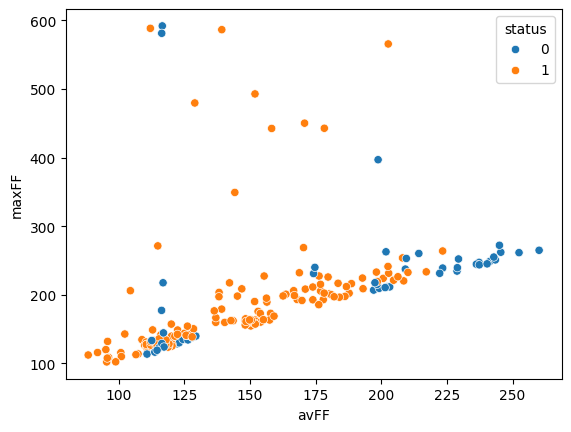

In [11]:
scat_plt(renamed_df.avFF, renamed_df.maxFF, renamed_df.status)

### 6. Dataframe editor

In [79]:
a=dataframe_editor(renamed_df)


### 7. Normalizer

In [39]:
df_zscore=normalize(renamed_df,0)
df_minmax=normalize(renamed_df,1)

In [40]:
df_zscore

,avFF,maxFF,minFF,percJitter,absJitter,rap,ppq,ddp,lShimer,dbShimer,...,apq,dda,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,-0.827171,-0.435045,-0.949593,0.334054,0.747835,0.132621,0.758847,0.131417,0.744070,0.737637,...,0.332130,0.605972,-0.067719,-0.192729,-0.805764,1.756293,0.799266,0.479243,-0.209990,0.866655
1,-0.768992,-0.529611,-0.057572,0.713581,1.035010,0.452726,1.273531,0.451521,1.677413,1.763924,...,1.156477,1.544279,-0.137489,-0.632879,-0.386529,1.832844,1.476053,1.307819,0.274371,1.798974
2,-0.907141,-0.721312,-0.109593,0.882719,1.322186,0.718919,1.581616,0.719960,1.199605,1.024997,...,0.697392,1.172305,-0.290884,-0.279042,-0.660375,1.937062,1.138515,1.015070,-0.103363,1.399060
3,-0.907286,-0.647425,-0.113935,0.773398,1.322186,0.577399,1.280780,0.576194,1.336955,1.204598,...,0.804787,1.336788,-0.279998,-0.280624,-0.611559,1.827676,1.437245,1.290518,0.061985,1.802314
4,-0.923281,-0.604689,-0.130272,1.365379,1.896537,1.092937,2.041931,1.093977,1.831733,1.548404,...,1.213715,1.894585,-0.177569,-0.505444,-0.781010,1.904461,1.776368,0.095948,-0.129692,2.261262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,0.482226,0.370232,-0.506960,-0.336307,-0.400868,-0.227918,-0.310390,-0.226875,0.591871,0.629877,...,0.198771,0.757979,0.069100,-0.535269,-0.481968,-1.087904,-0.783511,-1.253611,0.720090,-0.815604
191,1.335764,0.611117,-0.616630,-0.119729,-0.400868,0.001210,-0.190781,0.002252,-0.116622,-0.098787,...,-0.312242,0.037013,-0.166931,-0.618870,-0.643260,-0.629882,-0.468652,-1.165475,1.051429,-0.417853
192,0.494306,0.468897,-0.965907,1.522140,1.035010,0.988481,0.795092,0.989522,-0.351549,-0.134707,...,-0.437340,-0.293922,2.036271,-0.904471,-0.875188,-1.127950,-1.011551,-0.815979,0.778335,-0.830273
193,1.075992,2.184421,-0.951730,0.243297,-0.113692,0.132621,0.164424,0.131417,-0.357912,-0.211678,...,-0.483957,-0.297205,1.172309,-0.647566,-0.455203,-1.339874,-0.972457,-0.228478,-0.635368,-0.923727
